In [1]:
# Libraries using
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and Exploring the Dataset
data = pd.read_csv('Dataset/Concrete_Data.csv')
data.sample(2)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
531,436.0,0.0,0.0,218.0,0.0,838.4,719.7,28,23.85
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34


In [3]:
# Checking for NULL values in the Dataset
data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_in_days                      0
Concrete_compressive_strength    0
dtype: int64

In [6]:
# Checking for Duplicated value in the Dataset
data[data.duplicated()].shape

(25, 9)

In [7]:
# Removing the Duplicated values from the Dataset
data.drop_duplicates(inplace = True)
data[data.duplicated()].shape

(0, 9)

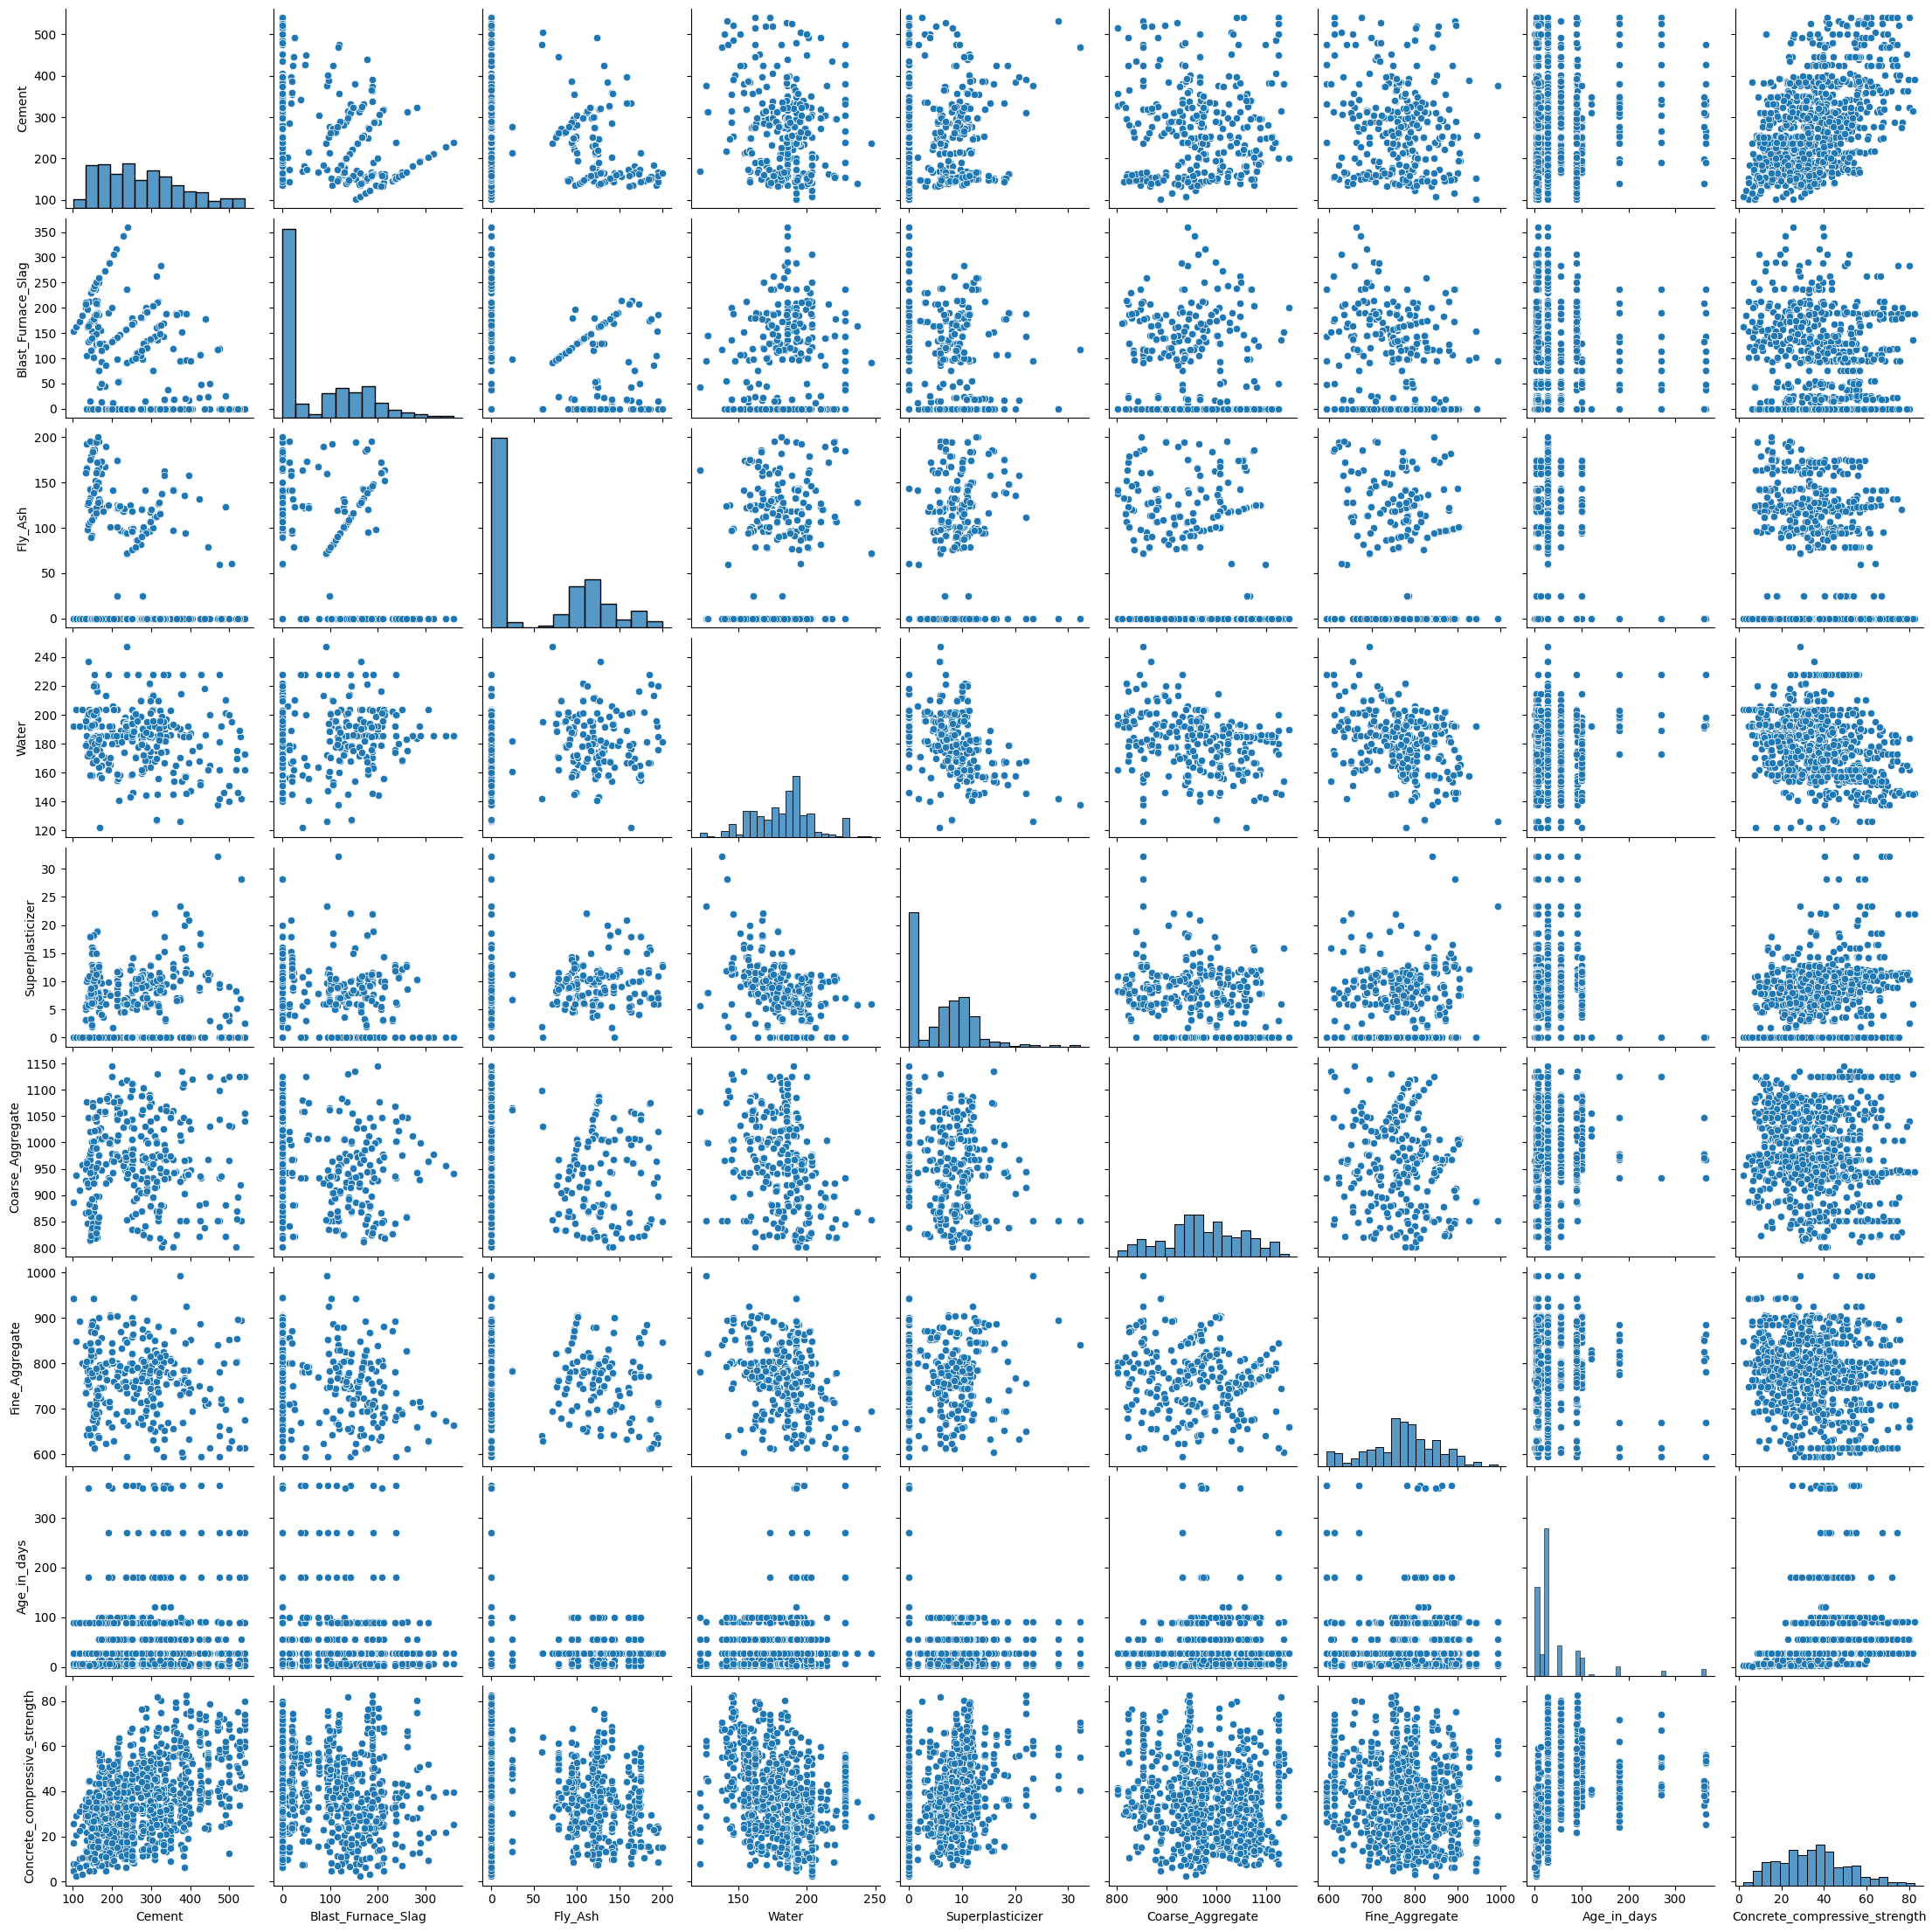

In [8]:
# Visualizing the Data using pairplot from seaborn
sns.pairplot(data)

In [9]:
# Checking the Correlation of the Data
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
Cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast_Furnace_Slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly_Ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse_Aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine_Aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age_in_days,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<Axes: >

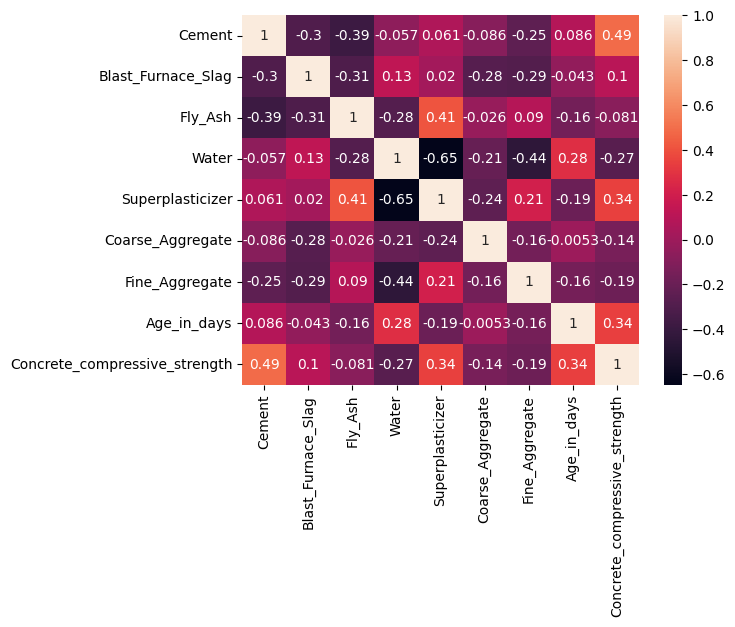

In [10]:
# Visualizing the Correlation Data using Heatmap
sns.heatmap(data.corr(), annot = True)

<Axes: >

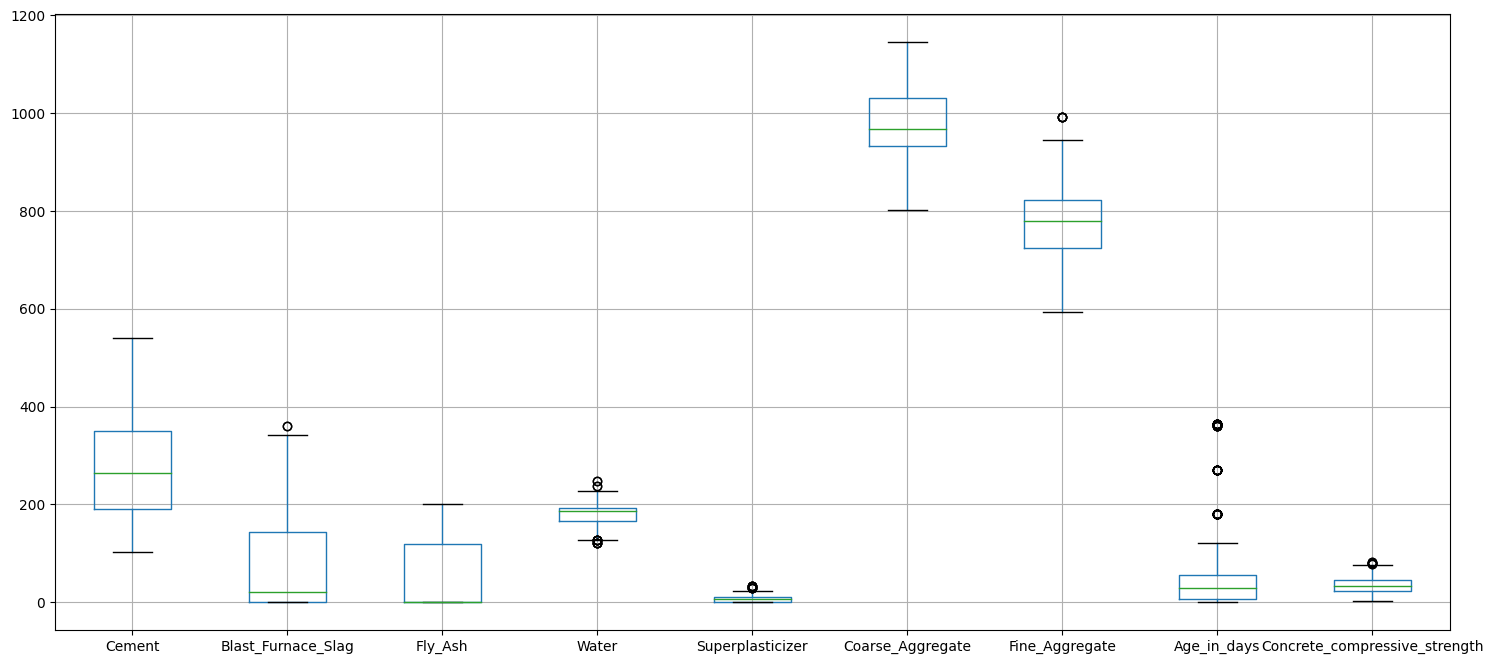

In [13]:
# Visualizing the Boxplot for all the feature
plt.figure(figsize = (18, 8))
col = pd.DataFrame(data, columns = data.columns)
col.boxplot()

In [15]:
# Dividing the Data into X and y
X = data.iloc[:, :-1]
y= data.iloc[:, -1 :]

In [16]:
# Splitting the Data into Train and Test with test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [17]:
# Displaying the size of Test and Train in both X and y
print('X_train Shape : ', X_train.shape)
print('y_train Shape : ', y_train.shape)
print('X_test Shape : ', X_test.shape)
print('y_test Shape : ', y_test.shape)

X_train Shape :  (703, 8)
y_train Shape :  (703, 1)
X_test Shape :  (302, 8)
y_test Shape :  (302, 1)


In [18]:
# Standardizing the X in which we will use fit_transform for X_train, and transform for X_test
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Model Training
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
regression.coef_

array([[11.87498956,  8.24496839,  5.06597472, -3.37958189,  1.83741718,
         1.28042495,  1.36035618,  7.10326595]])

In [23]:
regression.intercept_

array([35.52385491])

In [24]:
# Prediction using the test data
reg_pred = regression.predict(X_test)
reg_pred.shape

(302, 1)

Text(0, 0.5, 'Test Predict Data')

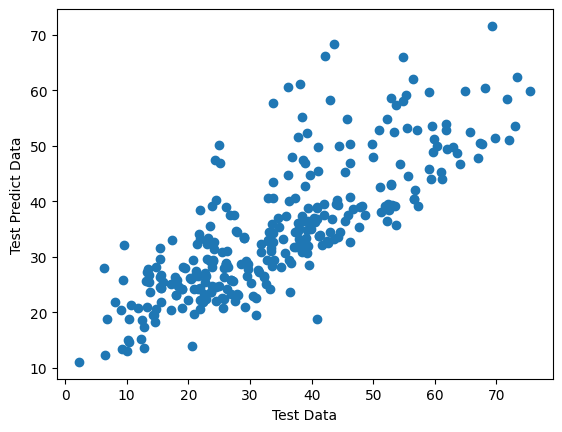

In [25]:
# Validating the Model by plotting it into a scatter plot check whether they have a linear
plt.scatter(y_test, reg_pred)
plt.xlabel('Test Data')
plt.ylabel('Test Predict Data')

In [26]:
# Residuals
residuals = y_test - reg_pred
residuals.shape

(302, 1)

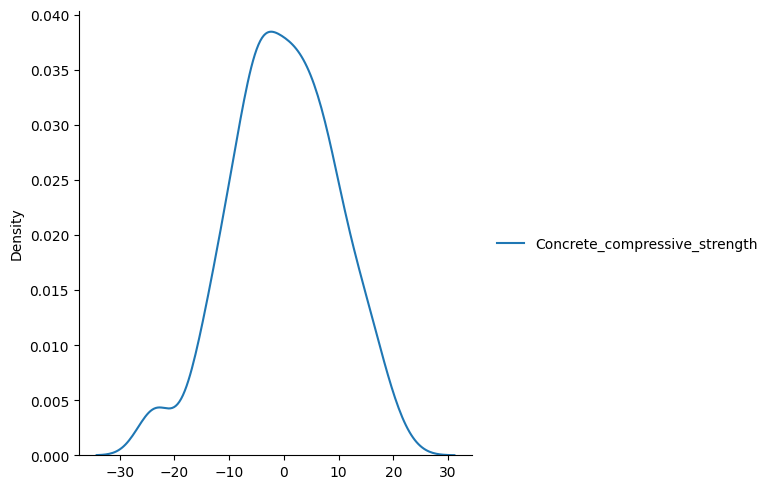

In [27]:
# Visualizing the Residuals
sns.displot(residuals, kind='kde')

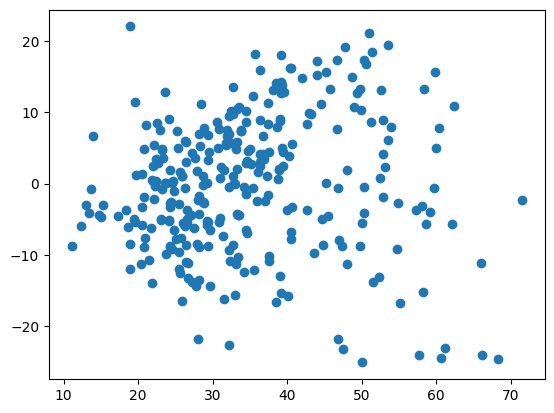

In [28]:
# Scatter plot the Reg_pred and the Residuals
plt.scatter(reg_pred, residuals)

In [32]:
# Performance Metrics
print('Mean Squared Error : ', mean_squared_error(y_test, reg_pred))
print('Sq.Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, reg_pred)))
print('Mean Absolute Error : ', mean_absolute_error(y_test, reg_pred))
print('R2_Score : ', r2_score(y_test, reg_pred))
print('Adj-R2 : ', 1 - (1 - r2_score(y_test, reg_pred)) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1) )

Mean Squared Error :  90.6433888675415
Sq.Root Mean Squared Error :  9.520682163980767
Mean Absolute Error :  7.675386623952861
R2_Score :  0.6333812700797719
Adj-R2 :  0.6233712023686393
